In [ ]:
import os, shutil

original_dataset_dir = 'C:\\Users\\lee\\datasets\\cats_and_dogs\\train\\train'

base_dir = 'C:\\Users\\lee\\datasets\\cats_and_dogs\\cats_and_dogs_small'

#os.mkdir(base_dir)

In [ ]:
''' 훈련, 검증, 테스트 분할을 위한 디렉터리 '''

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [ ]:
''' 훈련용 고양이 사진 디렉터리 '''
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

''' 훈련용 강아지 사진 디렉터리 '''
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

''' 검증용 고양이 사진 디렉터리 '''
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

''' 검증용 강아지 사진 디렉터리 '''
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

''' 테스트용 고양이 사진 디렉터리 '''
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

''' 테스트용 강아지 사진 디렉터리 '''
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [ ]:
''' 처음 1000개의 고양이 이미지를 train_cats_dir에 복사 '''
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
''' 다음 500개의 고양이 이미지를 validation_cats_dir에 복사 '''
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
''' 다음 500개의 고양이 이미지를 test_cats_dir에 복사 '''
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    rmv = os.path.join(train_cats_dir, fname)
    os.remove(rmv)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
''' 처음 1000개의 강아지 이미지를 train_dogs_dir에 복사 '''
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
''' 다음 500개의 강아지 이미지를 validation_dogs_dir에 복사 '''
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
''' 다음 500개의 강아지 이미지를 test_dogs_dir에 복사 '''
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
len(os.listdir(train_cats_dir))

1000

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
          

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

c:\users\lee\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size = (150, 150),
batch_size = 20,
class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
                                train_generator,
                                steps_per_epoch = 100,
                                epochs = 30,
                                validation_data = validation_generator,
                                validation_steps = 50)

c:\users\lee\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.6911 - acc: 0.5205 - val_loss: 0.6750 - val_acc: 0.5820
Epoch 2/30
100/100 [==============================] - 91s 907ms/step - loss: 0.6477 - acc: 0.6200 - val_loss: 0.6267 - val_acc: 0.6500
Epoch 3/30
100/100 [==============================] - 77s 769ms/step - loss: 0.5990 - acc: 0.6690 - val_loss: 0.6279 - val_acc: 0.6290
Epoch 4/30
100/100 [==============================] - 79s 790ms/step - loss: 0.5628 - acc: 0.7110 - val_loss: 0.5891 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 76s 760ms/step - loss: 0.5310 - acc: 0.7330 - val_loss: 0.5688 - val_acc: 0.6930
Epoch 6/30
100/100 [==============================] - 76s 761ms/step - loss: 0.5054 - acc: 0.7445 - val_loss: 0.5925 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 77s 775ms/step - loss: 0.4764 - acc: 0.7760 - val_loss: 0.5857 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 76s

In [ ]:
model.save('cats_and_dogs_small_1.h5')

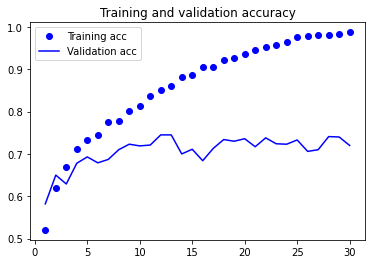

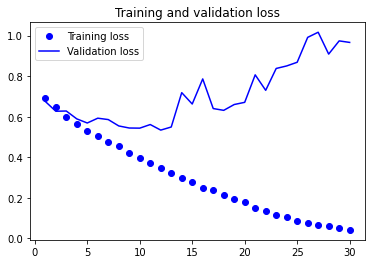

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()